In [1]:
using FFTW
using Plots
using WAV
using FileIO
using WebIO
using OffsetArrays

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-2686390145193646265\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-17451496941009844175\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-2686390145193646265\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [6]:
bird=wavread("bird_sound.wav")

([0.0018616290780358287 0.0032349620044557024; -0.0006103701895199438 0.0005493331705679495; … ; 0.0017090365306558428 -0.0008239997558519242; 0.001281777397991882 -0.0004882961516159551], 22050.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x02, 0x00, 0x22, 0x56, 0x00, 0x00, 0x88, 0x58, 0x01, 0x00, 0x04, 0x00, 0x10, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x41, 0x52, 0x54, 0x10, 0x00  …  0x35, 0x38, 0x2e, 0x34, 0x35, 0x2e, 0x31, 0x30, 0x30, 0x00])])

In [48]:
birs=wavplay("bird_sound.wav")

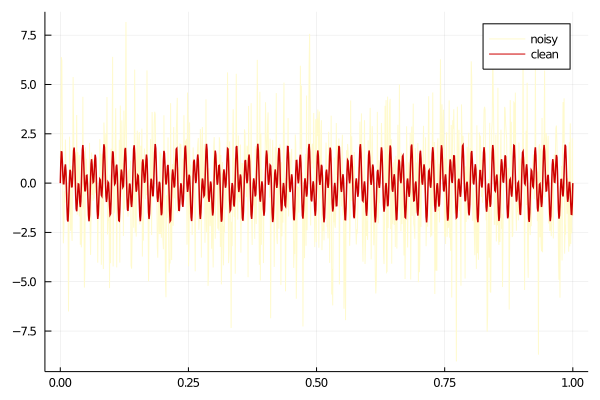

In [2]:
dt=1000
t=LinRange(0,1,dt)
f=sin.(2*pi*50*t) .+ sin.(2*pi*120*t)
f_clean=f
f=f+2.5*randn(length(t))

plot(t,f, linecolor = :lemonchiffon1,linewidth=1, label="noisy")
plot!(t,f_clean, linecolor=:red3,linewidth=1.5, label="clean")

In [88]:
dt=166896
fs=bird[2]
dlugosc=length(am_bird)
t=LinRange(0,dlugosc/fs,dt)
am_bird=bird[1][:,1]
plot(t,am_bird, linecolor=:red3,linewidth=1.5, label="clean")

In [54]:
t |> println


range(0.0f0, stop=15.1379595f0, length=166896)


In [89]:
n=length(t)
fhat=fft(am_bird)  #compute the fft
PSD= fhat .*conj(fhat)/n  #power spectrum
#left_PSD=PSD[:,1]

166896-element Array{Complex{Float64},1}:
  6.509209065709007e-11 + 0.0im
  3.550913035918446e-10 + 0.0im
 1.6231113541493775e-10 + 0.0im
 2.1732429955395974e-10 + 0.0im
 3.3904716893050685e-10 + 0.0im
 1.3651945749311796e-10 + 0.0im
 1.8964947531042142e-10 + 0.0im
  8.638920550171663e-11 + 0.0im
  5.278197003574047e-10 + 0.0im
  4.752912152183048e-10 + 0.0im
 4.5891779027314376e-10 + 0.0im
  2.860969886894917e-10 + 0.0im
  4.727816548348617e-10 + 0.0im
                        ⋮
  4.727816548348403e-10 + 0.0im
 2.8609698868947843e-10 + 0.0im
  4.589177902731003e-10 + 0.0im
  4.752912152182878e-10 + 0.0im
   5.27819700357411e-10 + 0.0im
   8.63892055017194e-11 + 0.0im
 1.8964947531039872e-10 + 0.0im
  1.365194574931204e-10 + 0.0im
  3.390471689305023e-10 + 0.0im
 2.1732429955396737e-10 + 0.0im
 1.6231113541493406e-10 + 0.0im
 3.5509130359186685e-10 + 0.0im

In [97]:
#plot(abs.(left_PSD), linecolor = :red3,linewidth=1, label="noisy")
#plot(abs.(PSD), linecolor = :red3,linewidth=1, label="noisy")
plot(abs.(fhat), linecolor = :red3,linewidth=1, label="noisy")

In [109]:
indices = [i > 2.5 for i in real(fhat)]
#indices = [i > 0 for i in real(PSD)]
#indices = [i > 0 for i in real(left_PSD)]  #find all freqs with large power
PSDclean = fhat .*indices 
#PSDclean = PSD .*indices 
#PSDclean = left_PSD .*indices 
#left_PSD

166896-element Array{Complex{Float64},1}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 - 0.0im
     ⋮
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 - 0.0im
 0.0 + 0.0im
 0.0 - 0.0im

In [116]:
#l=length(PSDclean)

In [111]:
plot(abs.(PSDclean), linecolor = :red3,linewidth=1, label="coś")

In [112]:
filtered= ifft(PSDclean)

166896-element Array{Complex{Float64},1}:
  0.016053804237705502 + 2.2351340731596477e-19im
  0.004876615459827791 + 4.447242900442941e-19im
 -0.012720122356054835 + 7.17131572819312e-19im
 -0.012662082772766578 + 8.705967480786138e-19im
   0.00431519032943871 + 1.489165880239564e-18im
  0.014457610965377956 + 6.746158621303598e-19im
 0.0045548197057507485 + 3.2884254292615696e-19im
 -0.010548930735878214 + 3.0161728268460325e-19im
  -0.01003354914412341 + 4.417572320401335e-19im
  0.003974226610314268 - 1.0226822662099476e-19im
   0.01109812307310458 + 1.2192503489170573e-18im
  0.002226660167450543 - 7.352440789791181e-19im
 -0.008876118216766952 + 1.4133499414273694e-18im
                       ⋮
 -0.009099634940343342 + 3.7265553472207675e-19im
 0.0022980496533697658 - 5.841797261245204e-19im
  0.011233456877123928 + 1.1845934269955797e-18im
 0.0039286404949392265 - 3.250211009103518e-19im
 -0.010107654578219393 - 6.072521368324204e-19im
 -0.010402302818918905 - 1.1280102530252034e

In [115]:
#plot(real.(filtered), linecolor = :red3,linewidth=1, label="denoised")

In [114]:
@time wavplay(real.(filtered),bird[2])

  7.749133 seconds (166.95 k allocations: 5.460 MiB)
